In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()   # kyphosis is a spinal condition, age is age of childrens in months.

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


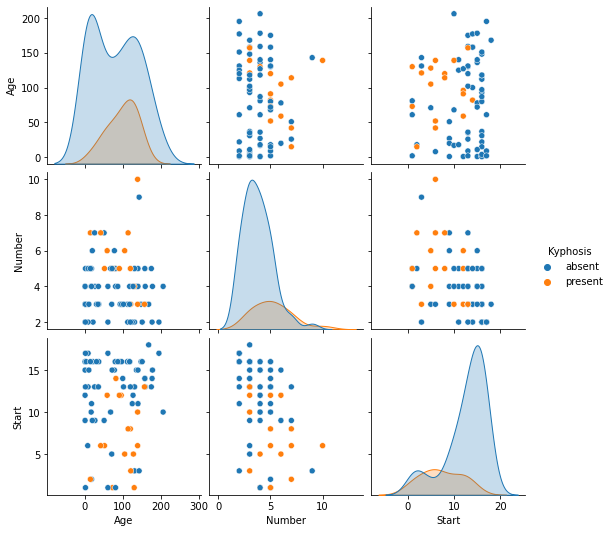

In [8]:
sns.pairplot(df, hue='Kyphosis')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# We want to predict after the surgery whether the patient was healed or not

X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis'] 

In [12]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
# Making a single decision tree
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
predictions = dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[15  3]
 [ 1  6]]


              precision    recall  f1-score   support

      absent       0.94      0.83      0.88        18
     present       0.67      0.86      0.75         7

    accuracy                           0.84        25
   macro avg       0.80      0.85      0.82        25
weighted avg       0.86      0.84      0.85        25



In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=200)  # imp and better than trees for majority datasets

In [21]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [22]:
rfc_pred = rfc.predict(X_test)

In [23]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[18  0]
 [ 5  2]]


              precision    recall  f1-score   support

      absent       0.78      1.00      0.88        18
     present       1.00      0.29      0.44         7

    accuracy                           0.80        25
   macro avg       0.89      0.64      0.66        25
weighted avg       0.84      0.80      0.76        25



In [24]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64